In [1]:
# Checking Python version
import sys
sys.version

'3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]'

# Problem Statement
 Predicting promotion of the candidate

## Data Description

Variable				Definition  
employee_id				--> Unique ID for employee  
department				--> Department of employee  
region					--> Region of employment (unordered)  
education				--> Education Level  
gender					--> Gender of Employee  
recruitment_channel		--> Channel of recruitment for employee  
no_of_trainings			--> no of other trainings completed in previous year on soft skills, technical skills etc.  
age						--> Age of Employee  
previous_year_rating	--> Employee Rating for the previous year  
length_of_service		--> Length of service in years  
KPIs_met >80%			--> if Percent of KPIs(Key performance Indicators) >80% then 1 else 0  
awards_won?				--> if awards won during previous year then 1 else 0  
avg_training_score		--> Average score in current training evaluations  
is_promoted	(Target) 	--> Recommended for promotion  

## Import the import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read and view the data

In [3]:
train_df = pd.read_csv("train_LZdllcl.csv")
test_df = pd.read_csv("test_2umaH9m.csv")

In [4]:
# Display first 5 values of train data
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [5]:
# Display last 5 values of train data
train_df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [6]:
# Display first 5 values of test data
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
# Display last 5 values of test data
test_df.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,1,0,89


# 2. Exploratory data analysis

In [8]:
# Shape of the dataframes
print("shape of train data = ",train_df.shape)

print("shape of test data = ",test_df.shape)


shape of train data =  (54808, 14)
shape of test data =  (23490, 13)


In [9]:
# Attribute names
#cols=[]
cols =train_df.columns
#list(cols)
print (type(cols))
cols

<class 'pandas.core.indexes.base.Index'>


Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### Our target is predicting the promotion therefore copy it to target variable 'y'

In [10]:
y = train_df.is_promoted
print("shape of target =",y.shape)
y.value_counts()

shape of target = (54808,)


0    50140
1     4668
Name: is_promoted, dtype: int64

## Datatypes of the train and test

In [11]:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [12]:
test_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object

In [13]:
# Change the datatypes as required
# for training data
train_df['no_of_trainings'] = train_df['no_of_trainings'].astype("object")
train_df['KPIs_met >80%'] = train_df['KPIs_met >80%'].astype("object")
train_df['awards_won?'] = train_df['awards_won?'].astype("object")
train_df['is_promoted'] = train_df['is_promoted'].astype("object")

# for test data

test_df['no_of_trainings'] = test_df['no_of_trainings'].astype("object")
test_df['KPIs_met >80%'] = test_df['KPIs_met >80%'].astype("object")
test_df['awards_won?'] = test_df['awards_won?'].astype("object")


In [14]:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings          object
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
is_promoted              object
dtype: object

In [15]:
test_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings          object
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
dtype: object

## Check for null or NAs 

In [16]:
train_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [17]:
test_df.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [18]:
print("Percentage of NAs in train education ={}%".format(np.round(train_df.education.isna().sum()/len(train_df)*100,2)))
print("Percentage of NAs in train previous_year_rating ={}%".format(np.round(train_df.previous_year_rating.isna().sum()/len(train_df)*100,2)))
print("\n")
print("Percentage of NAs in test education ={}%".format(np.round(test_df.education.isna().sum()/len(test_df)*100,2)))
print("Percentage of NAs in test previous_year_rating ={}%".format(np.round(test_df.previous_year_rating.isna().sum()/len(test_df)*100,2)))


Percentage of NAs in train education =4.4%
Percentage of NAs in train previous_year_rating =7.52%


Percentage of NAs in test education =4.4%
Percentage of NAs in test previous_year_rating =7.71%


## Fill the NAs in train and test
for categorical data use mode and for integer data use mean

In [19]:
# Train data
# Education
train_df.iloc[train_df[train_df.education.isna()==True].index,train_df.columns.get_loc('education')] = "Bachelor's"
# previous_year_rating
train_df.iloc[train_df[train_df.previous_year_rating.isna()==True].index,train_df.columns.get_loc('previous_year_rating')] = train_df['previous_year_rating'].mean()

In [20]:
# test data
# Education
test_df.iloc[test_df[test_df.education.isna()==True].index,test_df.columns.get_loc('education')] = "Bachelor's"
# previous_year_rating
test_df.iloc[test_df[test_df.previous_year_rating.isna()==True].index,test_df.columns.get_loc('previous_year_rating')] = test_df['previous_year_rating'].mean()

In [21]:
# Check NAs
train_df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [22]:
# Check NAs
test_df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

## Summary of train and test data

In [23]:
# summary stats of only object datatype of train data
train_df.describe(include='object').transpose()

,count,unique,top,freq
department,54808,9,Sales & Marketing,16840
region,54808,34,region_2,12343
education,54808,3,Bachelor's,39078
gender,54808,2,m,38496
recruitment_channel,54808,3,other,30446
no_of_trainings,54808,10,1,44378
KPIs_met >80%,54808,2,0,35517
awards_won?,54808,2,0,53538
is_promoted,54808,2,0,50140


In [24]:
# summary stats of only object datatype of test data
test_df.describe(include='object').transpose()

,count,unique,top,freq
department,23490,9,Sales & Marketing,7315
region,23490,34,region_2,5299
education,23490,3,Bachelor's,16612
gender,23490,2,m,16596
recruitment_channel,23490,3,other,13078
no_of_trainings,23490,9,1,18928
KPIs_met >80%,23490,2,0,15061
awards_won?,23490,2,0,22955


from above summary stats of train and test data we assume that the distribution of train and test data is simillar

In [25]:
# summary stats of only integer datatype of train data
train_df.describe(include=['int64','float64']).transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,54808.0,3.329256,1.211661,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0


In [26]:
# summary stats of only integer datatype of test data
test_df.describe(include=['int64','float64']).transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,23490.0,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
age,23490.0,34.782929,7.679492,20.0,29.00,33.0,39.0,60.0
previous_year_rating,23490.0,3.339146,1.213590,1.0,3.00,3.0,4.0,5.0
length_of_service,23490.0,5.810387,4.207917,1.0,3.00,5.0,7.0,34.0
avg_training_score,23490.0,63.263133,13.411750,39.0,51.00,60.0,76.0,99.0


In [27]:
cols

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [28]:
# Drop the Attribute 'is_promoted' from train data 
train = train_df.drop(labels='is_promoted',axis=1)
train_cols = train.columns

train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [29]:
# drop the Attribute employee_id in train and test
train = train.drop(labels='employee_id',axis=1)
test = test_df.drop(labels='employee_id',axis=1)

print("train =" , train.shape)
print('test =',test.shape)

train = (54808, 12)
test = (23490, 12)


In [30]:
# integer and category columns names
train_cols_int = train.describe(include=['int64','float64']).columns
train_cols_obj = train.describe(include=['object']).columns

test_cols_int = test.describe(include=['int64','float64']).columns
test_cols_obj = test.describe(include=['object']).columns

## View the correlation of Attributes

In [31]:
train.corr()

,age,previous_year_rating,length_of_service,avg_training_score
age,1.000000,0.005710,0.657111,-0.048380
previous_year_rating,0.005710,1.000000,0.000239,0.072065
length_of_service,0.657111,0.000239,1.000000,-0.038122
avg_training_score,-0.048380,0.072065,-0.038122,1.000000


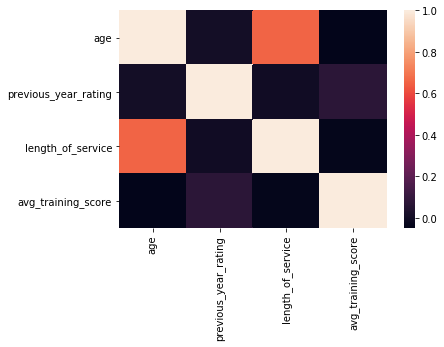

In [32]:
sns.heatmap(train.corr())

Text(0.5, 1.0, 'Employee length of Service v/s Age')

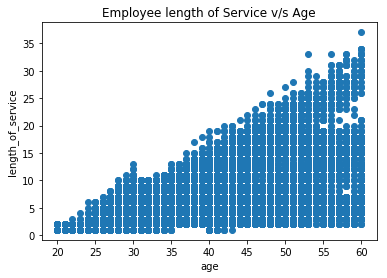

In [33]:
plt.scatter(x=train.age,y=train.length_of_service)
plt.xlabel("age")
plt.ylabel("length_of_service")
plt.title("Employee length of Service v/s Age")

Text(0.5, 1.0, 'Employee length of Service v/s Age \n with promoted employe')

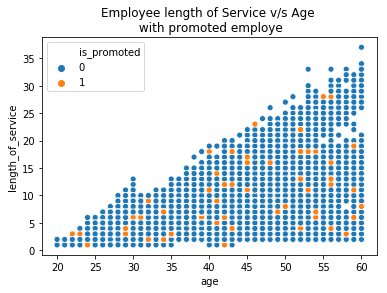

In [34]:
sns.scatterplot(x=train.age,y=train.length_of_service,hue=y)
plt.title("Employee length of Service v/s Age \n with promoted employe")

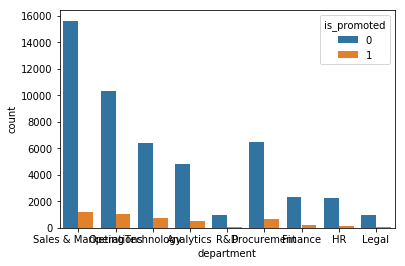

In [35]:
sns.countplot(x=train.department, hue=y)

# 2. Prepare the data to train model and validate, also the test data

In [36]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [37]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,3.339146,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.000000,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.000000,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.000000,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.000000,7,0,0,61


In [38]:
for x in train_cols_obj:
    print("uniqe values of {} are {}".format(x,len(train[x].unique())))

uniqe values of department are 9
uniqe values of region are 34
uniqe values of education are 3
uniqe values of gender are 2
uniqe values of recruitment_channel are 3
uniqe values of no_of_trainings are 10
uniqe values of KPIs_met >80% are 2
uniqe values of awards_won? are 2


In [39]:
for x in train_cols_obj:
    print("uniqe values of {} are {}".format(x,len(test[x].unique())))

uniqe values of department are 9
uniqe values of region are 34
uniqe values of education are 3
uniqe values of gender are 2
uniqe values of recruitment_channel are 3
uniqe values of no_of_trainings are 9
uniqe values of KPIs_met >80% are 2
uniqe values of awards_won? are 2


As there are many nominal categorical values in region drop the column in data

In [40]:
train = train.drop(labels='region',axis=1)
test = test.drop(labels='region',axis=1)
print(len(train.columns))
print(len(test.columns))

11
11


In [41]:
# Convert Attribute no_of_trainings as integer
train['no_of_trainings'] = train['no_of_trainings'].astype('int64')
test['no_of_trainings'] = test['no_of_trainings'].astype('int64')

In [42]:
train.dtypes

department               object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
dtype: object

In [43]:
test.dtypes

department               object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%            object
awards_won?              object
avg_training_score        int64
dtype: object

In [44]:
# update categorical columns names
train_cols_obj =train.describe(include='object').columns
test_cols_obj =test.describe(include='object').columns



In [45]:
train_cols_obj = train_cols_obj.drop(['awards_won?','KPIs_met >80%'])
test_cols_obj = test_cols_obj.drop(['awards_won?','KPIs_met >80%'])

In [46]:
train_cols_obj

Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [47]:
test_cols_obj

Index(['department', 'education', 'gender', 'recruitment_channel'], dtype='object')

## One hot encoding for nominal categorical attribute

In [48]:
# train data
train_aft_ohe = train

for var in train_cols_obj:
    cat_list = 'var'+"_"+var
    cat_list = pd.get_dummies(train[var],prefix=var)
    train_aft_ohe = train_aft_ohe.join(cat_list)
    

# test data
test_aft_ohe = test

for var in test_cols_obj:
    cat_list = 'var'+'_'+var
    cat_list = pd.get_dummies(test[var],prefix=var)
    test_aft_ohe = test_aft_ohe.join(cat_list)


In [49]:
train_aft_ohe.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,...,1,0,0,0,1,1,0,0,0,1
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,...,0,0,1,0,0,0,1,1,0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,...,1,0,1,0,0,0,1,0,0,1
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,...,1,0,1,0,0,0,1,1,0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,...,0,1,1,0,0,0,1,1,0,0


In [50]:
train_aft_ohe.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,Master's & above,f,sourcing,1,35,5.0,8,1,0,...,1,0,0,0,1,1,0,0,0,1
1,Operations,Bachelor's,m,other,1,30,5.0,4,0,0,...,0,0,1,0,0,0,1,1,0,0
2,Sales & Marketing,Bachelor's,m,sourcing,1,34,3.0,7,0,0,...,1,0,1,0,0,0,1,0,0,1
3,Sales & Marketing,Bachelor's,m,other,2,39,1.0,10,0,0,...,1,0,1,0,0,0,1,1,0,0
4,Technology,Bachelor's,m,other,1,45,3.0,2,0,0,...,0,1,1,0,0,0,1,1,0,0


In [51]:
X = train_aft_ohe.drop(labels=train_cols_obj,axis=1)
X_test = test_aft_ohe.drop(labels=test_cols_obj,axis=1)

In [52]:
X.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,1,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,1,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,1,1,0,0,0,1,1,0,0


In [53]:
print(len(X.columns))
X.columns

24


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

In [54]:
print(len(X_test.columns))
X_test.columns

24


Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'education_Bachelor's',
       'education_Below Secondary', 'education_Master's & above', 'gender_f',
       'gender_m', 'recruitment_channel_other', 'recruitment_channel_referred',
       'recruitment_channel_sourcing'],
      dtype='object')

## split the training data into training and validating set
i.e. X_train, X_valid, y_train, y_valid

In [55]:
from sklearn.model_selection import train_test_split


In [56]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y)

In [57]:
print(len(X_train))
print(len(X_valid))
print(len(y_train))
print(len(y_valid))

41106
13702
41106
13702


# 3. Build Machine Learning Model for validation and prediction on test data

## 3.1 Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
valid_log_reg = LogisticRegression()

In [60]:
# training the model
valid_log_reg.fit(X_train,y_train)

C:\Users\dhruva\AppData\Local\conda\conda\envs\py36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
# predicting on validation data
predict_valid_log_reg = valid_log_reg.predict(X_valid)

### Evaluate the validation set

In [62]:
from sklearn import metrics

In [63]:
metrics.confusion_matrix(y_valid,predict_valid_log_reg)

array([[12521,    49],
       [  850,   282]], dtype=int64)

In [64]:
from sklearn import metrics
print('Accuracy ={}% \n Recall ={}% \n Precision={}% \n F1 score ={}%'.format(
np.round(metrics.accuracy_score(y_valid,predict_valid_log_reg),2),
np.round(metrics.recall_score(y_valid,predict_valid_log_reg),2),
np.round(metrics.precision_score(y_valid,predict_valid_log_reg),2),
np.round(metrics.f1_score(y_valid,predict_valid_log_reg),2)))

Accuracy =0.93% 
 Recall =0.25% 
 Precision=0.85% 
 F1 score =0.39%


In [65]:
# predict on test data
predict_on_test_valid_log_reg = valid_log_reg.predict(X_test)

In [66]:
test_pediction_valid_log = pd.DataFrame(predict_on_test_valid_log_reg)

In [67]:
test_pediction_valid_log = test_pediction_valid_log.join(test_df.employee_id)

In [68]:
test_pediction_valid_log.head()

,0,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486


In [69]:
test_pediction_valid_log.columns = ['is_promoted','employee_id']

In [70]:
test_pediction_valid_log.head()

,is_promoted,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486


In [71]:
test_pediction_valid_log.index = test_pediction_valid_log.employee_id

In [72]:
test_pediction_valid_log.head()

,is_promoted,employee_id
employee_id,,
8724,0,8724
74430,0,74430
72255,0,72255
38562,0,38562
64486,0,64486


In [73]:
test_pediction_valid_log = test_pediction_valid_log.drop('employee_id',1) 

In [74]:
test_pediction_valid_log.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [75]:
test_pediction_valid_log.to_csv('test_pediction_valid_log.csv')

## 3.2 Decision tree

In [76]:
# import libraries
from sklearn.tree import DecisionTreeClassifier

In [77]:
valid_dt_clf = DecisionTreeClassifier()

In [78]:
# Train the model
valid_dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [79]:
# predict on validation set
predict_valid_dt_clf = valid_dt_clf.predict(X_valid)

In [80]:
metrics.confusion_matrix(y_valid,predict_valid_dt_clf)

array([[11822,   748],
       [  607,   525]], dtype=int64)

In [81]:
from sklearn import metrics
print('Accuracy ={}% \n Recall ={}% \n Precision={}% \n F1 score ={}%'.format(
np.round(metrics.accuracy_score(y_valid,predict_valid_dt_clf),2),
np.round(metrics.recall_score(y_valid,predict_valid_dt_clf),2),
np.round(metrics.precision_score(y_valid,predict_valid_dt_clf),2),
np.round(metrics.f1_score(y_valid,predict_valid_dt_clf),2)))

Accuracy =0.9% 
 Recall =0.46% 
 Precision=0.41% 
 F1 score =0.44%


the F1 score has improved

In [82]:
# predict on test data
predict_on_test_valid_dt_clf = valid_dt_clf.predict(X_test)

In [83]:
predict_on_test_valid_dt_clf = pd.DataFrame(predict_on_test_valid_dt_clf)

In [84]:
predict_on_test_valid_dt_clf.head()

,0
0,0
1,0
2,0
3,0
4,0


In [85]:
predict_on_test_valid_dt_clf = predict_on_test_valid_dt_clf.join(test_df.employee_id)
predict_on_test_valid_dt_clf.head()

,0,employee_id
0,0,8724
1,0,74430
2,0,72255
3,0,38562
4,0,64486


In [86]:
predict_on_test_valid_dt_clf.index = predict_on_test_valid_dt_clf.employee_id

In [87]:
predict_on_test_valid_dt_clf.head()

,0,employee_id
employee_id,,
8724,0,8724
74430,0,74430
72255,0,72255
38562,0,38562
64486,0,64486


In [88]:
predict_on_test_valid_dt_clf = predict_on_test_valid_dt_clf.drop('employee_id',1)

In [89]:
predict_on_test_valid_dt_clf.columns =['is_promoted']

In [90]:
predict_on_test_valid_dt_clf.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [91]:
predict_on_test_valid_dt_clf.to_csv('predict_on_test_valid_dt_clf.csv')

## 3.3 Random forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
# for 100 trees
valid_rf_100 = RandomForestClassifier(n_estimators=100, random_state=333)

In [108]:
# train the model
valid_rf_100.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=333, verbose=0, warm_start=False)

In [109]:
# predict on validation set
predict_valid_rf_100 = valid_rf_100.predict(X_valid)

In [110]:
metrics.confusion_matrix(y_valid,predict_valid_rf_100)

array([[12405,   165],
       [  741,   391]], dtype=int64)

In [111]:
from sklearn import metrics
print('Accuracy ={}% \n Recall ={}% \n Precision={}% \n F1 score ={}%'.format(
np.round(metrics.accuracy_score(y_valid,predict_valid_rf_100),2),
np.round(metrics.recall_score(y_valid,predict_valid_rf_100),2),
np.round(metrics.precision_score(y_valid,predict_valid_rf_100),2),
np.round(metrics.f1_score(y_valid,predict_valid_rf_100),2)))

Accuracy =0.93% 
 Recall =0.35% 
 Precision=0.7% 
 F1 score =0.46%


In [112]:
# for 1000 trees
valid_rf_1000 = RandomForestClassifier(n_estimators=1000, random_state=333)

In [113]:
# train the model
valid_rf_1000.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=333, verbose=0, warm_start=False)

In [114]:
# predict on validation set
predict_valid_rf_1000 = valid_rf_1000.predict(X_valid)

In [115]:
metrics.confusion_matrix(y_valid,predict_valid_rf_1000)

array([[12401,   169],
       [  741,   391]], dtype=int64)

In [116]:
from sklearn import metrics
print('Accuracy ={}% \n Recall ={}% \n Precision={}% \n F1 score ={}%'.format(
np.round(metrics.accuracy_score(y_valid,predict_valid_rf_1000),2),
np.round(metrics.recall_score(y_valid,predict_valid_rf_1000),2),
np.round(metrics.precision_score(y_valid,predict_valid_rf_1000),2),
np.round(metrics.f1_score(y_valid,predict_valid_rf_1000),2)))

Accuracy =0.93% 
 Recall =0.35% 
 Precision=0.7% 
 F1 score =0.46%


The random forest algorithm with 100 trees is just enough

In [118]:
predict_on_test_valid_rf_100 = valid_rf_100.predict(X_test)

In [119]:
predict_on_test_valid_rf_100 = pd.DataFrame(predict_on_test_valid_rf_100)
predict_on_test_valid_rf_100 = predict_on_test_valid_rf_100.join(test_df.employee_id)
predict_on_test_valid_rf_100.index = predict_on_test_valid_rf_100.employee_id
predict_on_test_valid_rf_100 = predict_on_test_valid_rf_100.drop('employee_id',1)
predict_on_test_valid_rf_100.head()

,0
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [120]:
predict_on_test_valid_rf_100.columns = ['is_promoted']
predict_on_test_valid_rf_100.head()

,is_promoted
employee_id,
8724,0
74430,0
72255,0
38562,0
64486,0


In [121]:
predict_on_test_valid_rf_100.to_csv('predict_on_test_valid_rf_100.csv')